In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("AmesHousing.csv")

# Printing first 5 records of the dataset
print(df.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
# to check for which column has null values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [4]:
# Drop a column  if it has a large percentage of missing data (threshhold 0.7)
threshhold = 0.70
missing = df.isnull().mean()
print(missing)

df.drop(columns = missing[missing > threshhold].index, inplace=True)
print(df.head(5))

Order             0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 82, dtype: float64
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2     

In [5]:
# drop rows with missing target values because they won't contribute to any learning
df.dropna(subset = ["SalePrice"], inplace=True)
print(df.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0            0         0        0       5 

Visualization for detecting normal distribution of each features

In [6]:
# list of all columns that contains null values
lst_null_values = df.columns[df.isnull().any()].tolist()
print(lst_null_values)

"""
# dictionary of all null values along with their column names
# Get columns with their number of missing values
null_values = df.isnull().sum()

# columns with missing values
columns_with_null = {col: null_values[col] for col in df.columns if null_values[col] > 0}
print(columns_with_null)"""

['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']


'\n# dictionary of all null values along with their column names\n# Get columns with their number of missing values\nnull_values = df.isnull().sum()\n\n# columns with missing values\ncolumns_with_null = {col: null_values[col] for col in df.columns if null_values[col] > 0}\nprint(columns_with_null)'

## Deal with numerical features

In [7]:
# select all numerical columns
num_clos = df.select_dtypes(include=['float64', 'int64']).columns
#print(num_clos)

# list of numerical features that contains null values
num_cols_null = [cols for cols in lst_null_values if cols in num_clos]
print(num_cols_null)

['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']


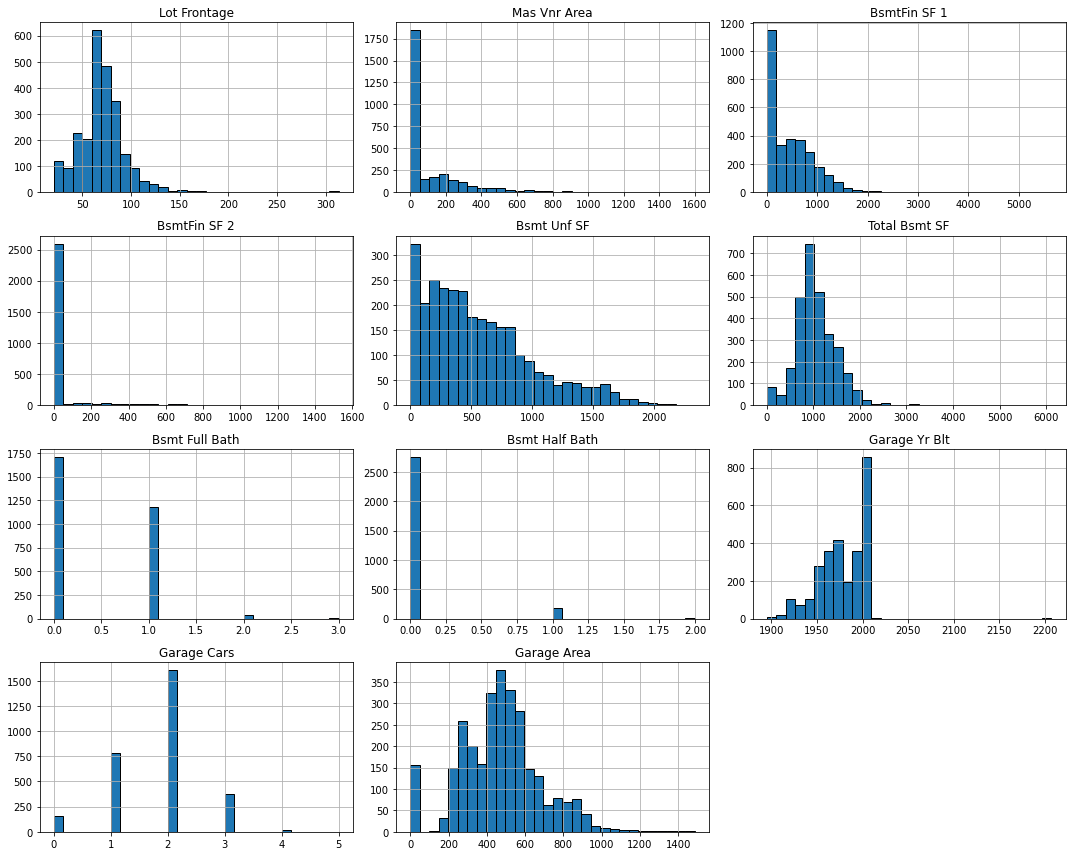

In [8]:
# plot histograms
df[num_cols_null].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

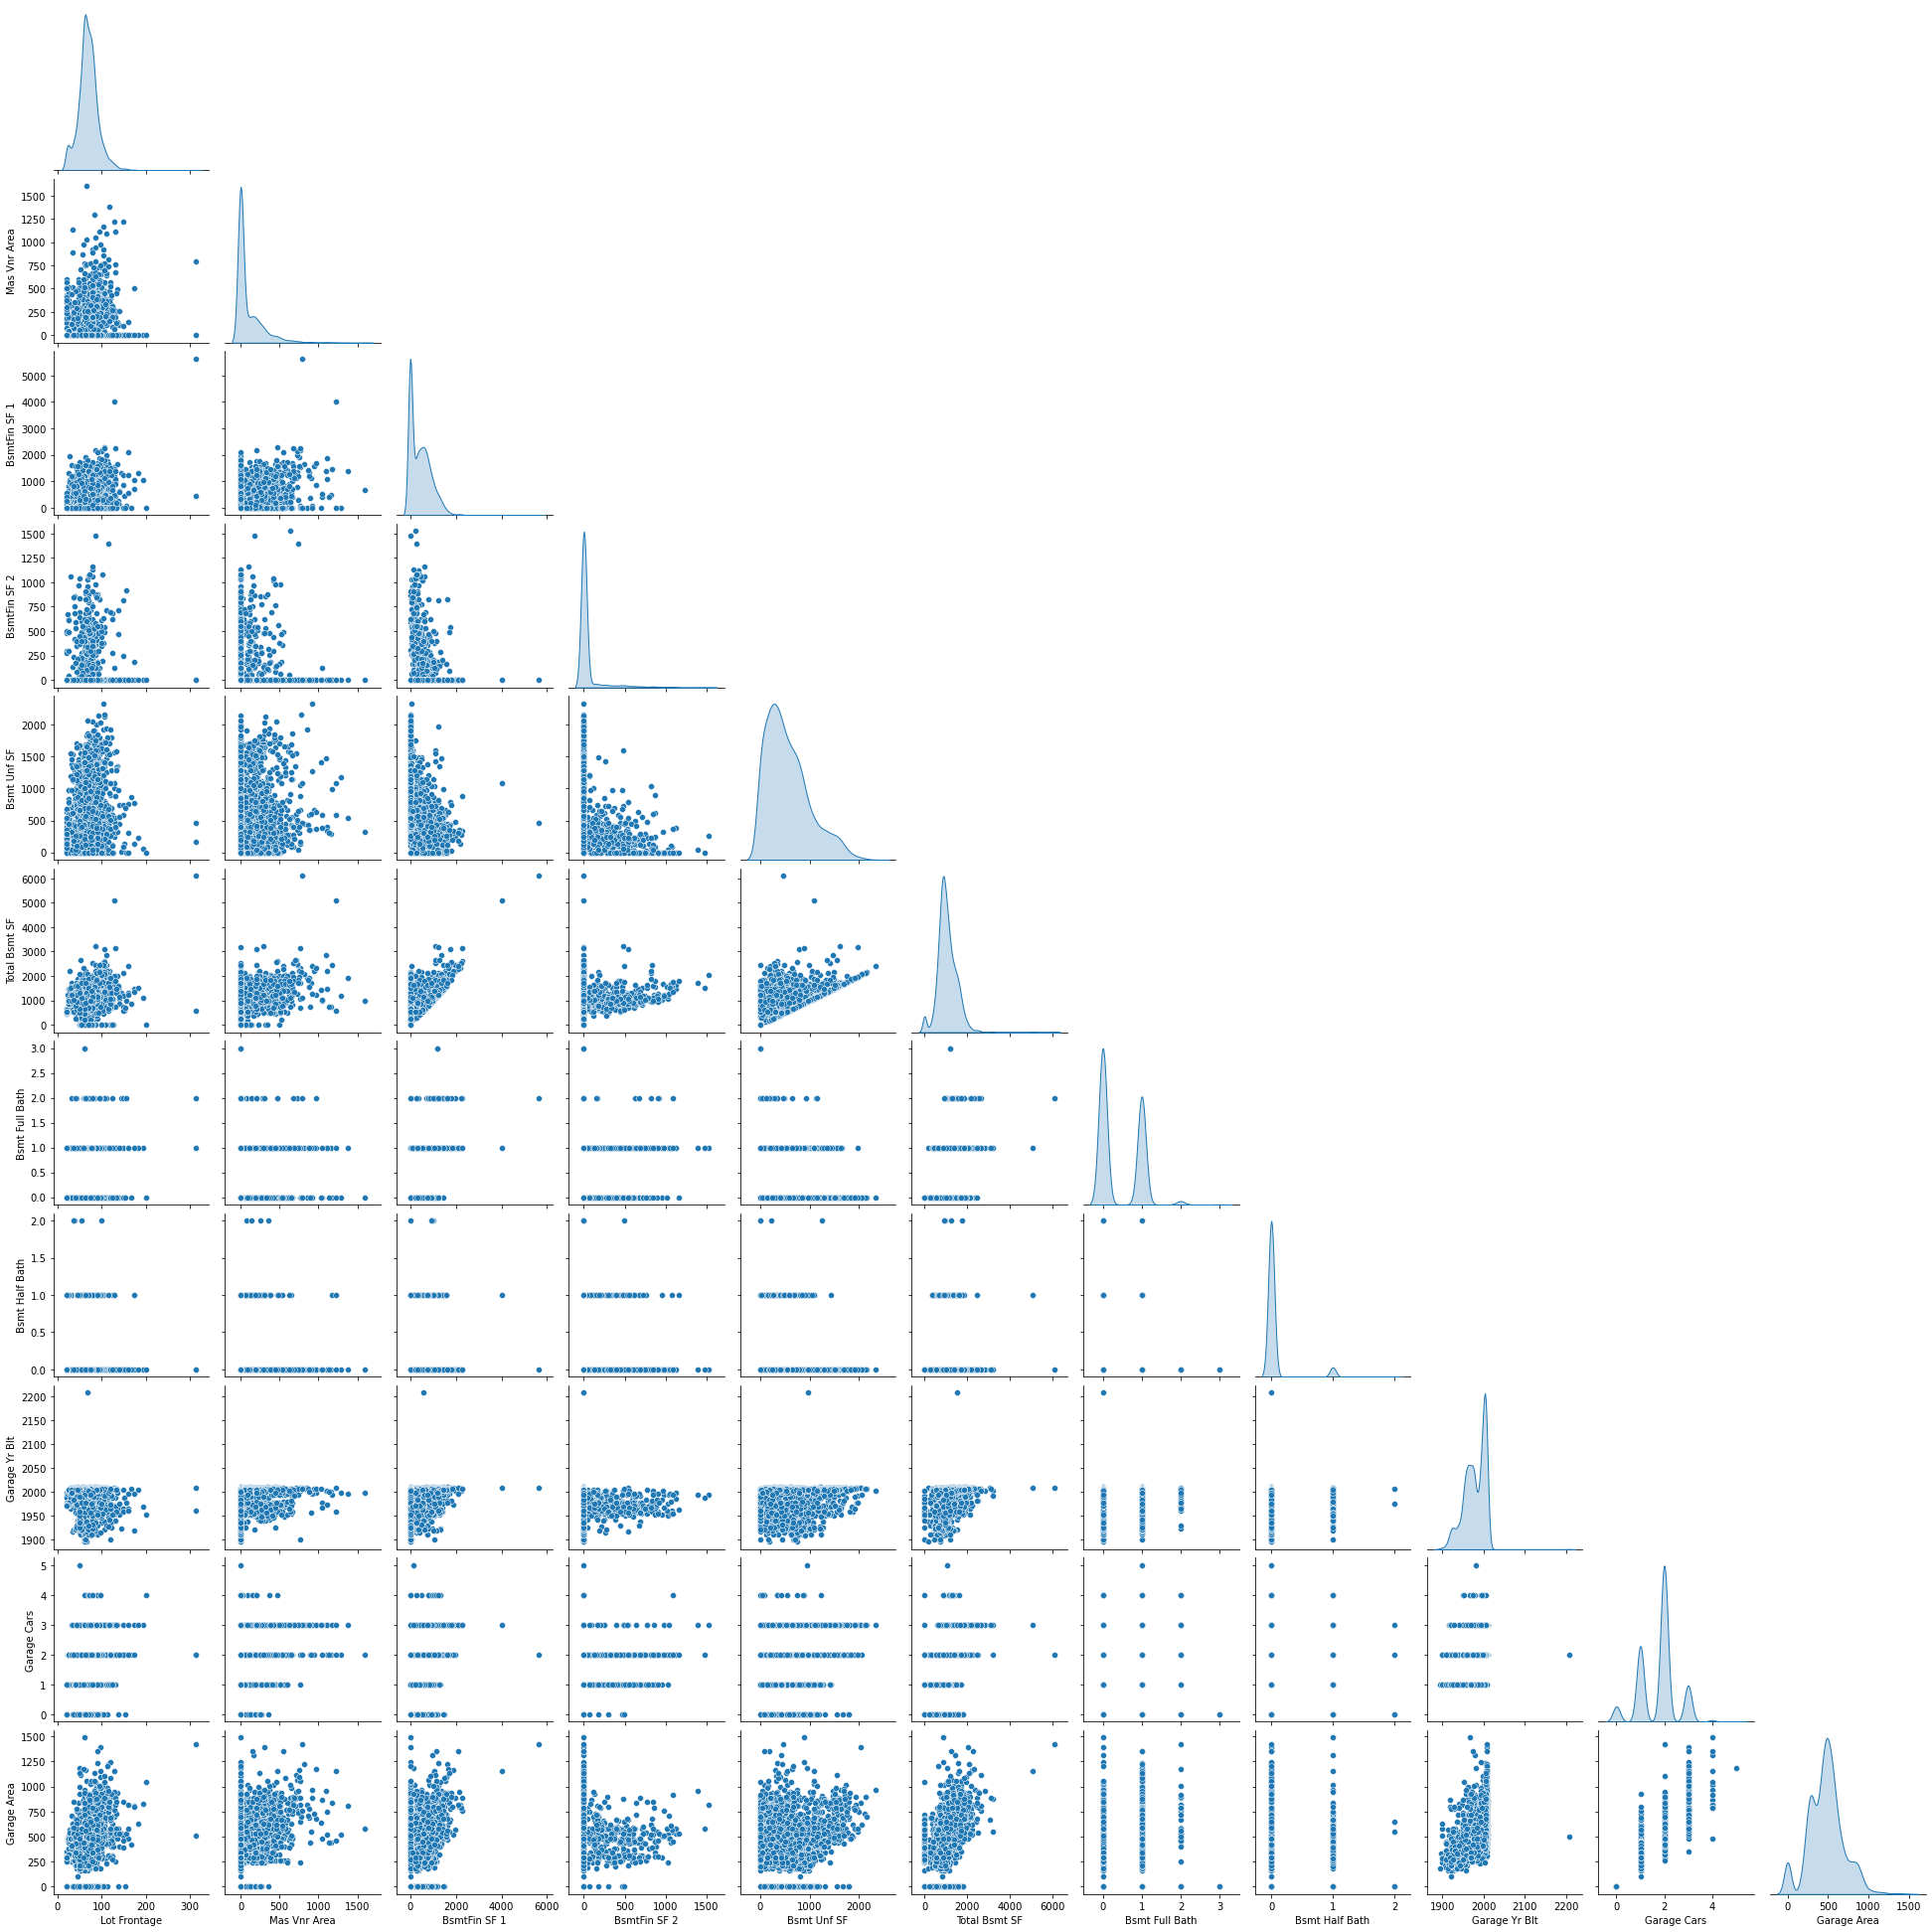

In [9]:
# Pair Plot (Scatterplot Matrix) with KDE Diagonals
sns.pairplot(df[num_cols_null], diag_kind='kde', corner=True)
plt.show()

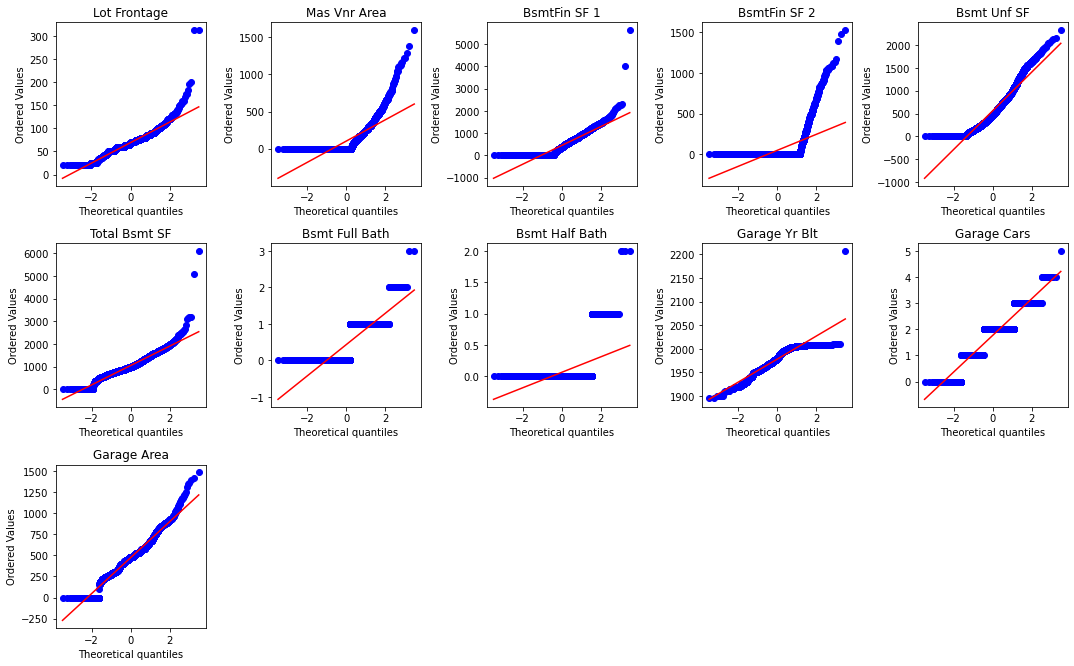

In [10]:
# Generate Q-Q plots for each numerical feature
plt.figure(figsize=(15, 12))
for i, column in enumerate(num_cols_null, 1):
    plt.subplot(4, 5, i)  # Adjust subplot layout as per number of features
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(column)

plt.tight_layout()
plt.show()

By using skewness we can detect where to apply mean and where to apply median

In [11]:
# check for skewed data
# Calculate skewness for each numerical column using skew and kurtosis
skewness = df[num_cols_null].apply(lambda x: skew(x.dropna()))

kurt = df[num_cols_null].apply(lambda x: kurtosis(x.dropna()))

# Combine skewness and kurtosis in a DataFrame
norm_null_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(norm_null_df.sort_values(by = ['Skewness', 'Kurtosis'], ascending=[True, True]))

                Skewness   Kurtosis
Garage Yr Blt  -0.384463   1.821119
Garage Cars    -0.219724   0.242504
Garage Area     0.241870   0.947353
Bsmt Full Bath  0.616323  -0.748761
Bsmt Unf SF     0.922580   0.406779
Total Bsmt SF   1.155612   9.117977
BsmtFin SF 1    1.415457   6.845533
Lot Frontage    1.498146  11.209384
Mas Vnr Area    2.605639   9.268606
Bsmt Half Bath  3.938776  14.894223
BsmtFin SF 2    4.137858  18.747388


Handle missing values by inserting means and median according to its skewness or normality

In [12]:
# here we will also do knn imputation in future for missing values based on the similarity of other observations in the datasets.

Fill missing data using mean and median depending on skewness.\
Note: Skewness between -0.5 and 0.5 = data is approximately symmetric\
Skewness between -1 and -0.5 = data is moderately skewed\
Skewness < -1 or Skewness > 1 = data is highly skewed

In [13]:
for row in norm_null_df.index:
    # for highly skewed.
    if norm_null_df.loc[row, "Skewness"] > 0.9 or norm_null_df.loc[row, "Skewness"] < -1:
        df[row] = df[row].fillna(df[row].median())
    else:
        df[row] = df[row].fillna(df[row].mean())

## Deal with categorical features

In [14]:
# select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

# list of categorical features that contains null values
cat_cols_null = [cols for cols in lst_null_values if cols not in num_cols_null]
print(cat_cols_null)

['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']
['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']


Visualizing the Distribution of the Categorical Data

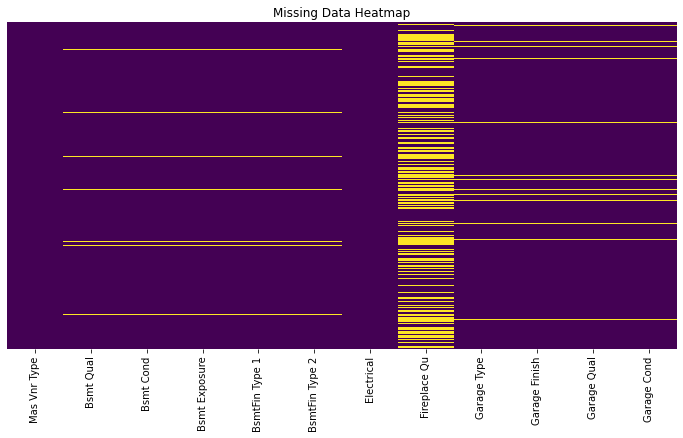

In [15]:
# Heatmap of missing data
# Heatmap helps us identify missingness patterns (random or systematic).

plt.figure(figsize=(12, 6))
sns.heatmap(df[cat_cols_null].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

We can see here scattered missing values (random), simple imputation (mode or new category) might work here.
Output Interpretation:
Yellow indicate missing data.
Dark areas represent non-missing (available) data.

In the heat map, "Fireplace Qu" has much more missing values, and others have less missing values. On the other hand, "Mass Vnr Type" and "Electrical" has much less missing values <1%.

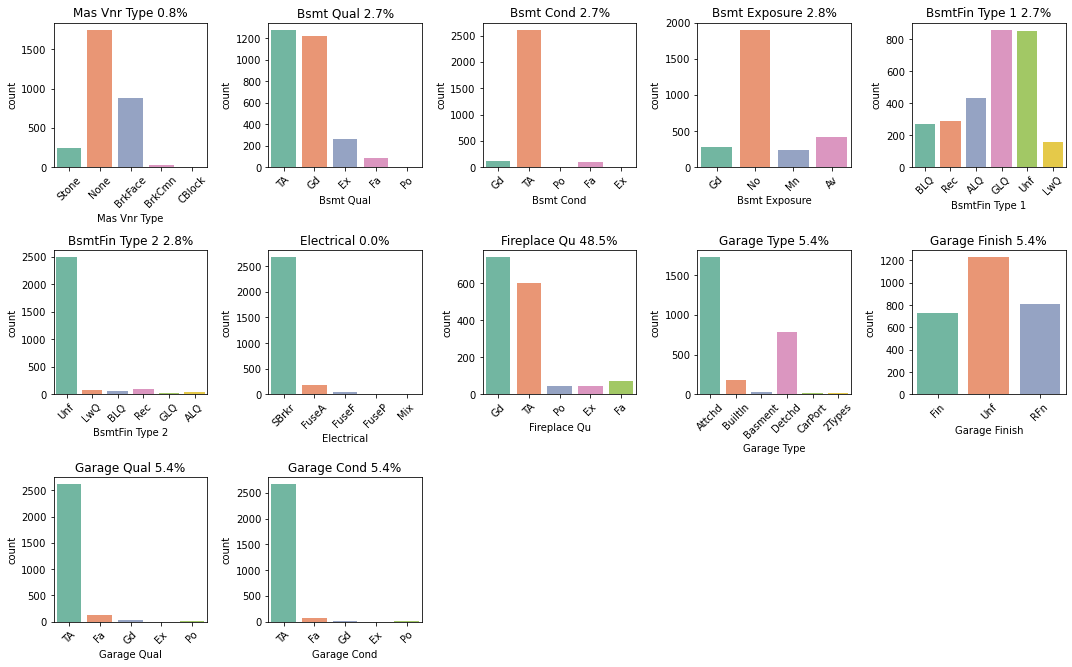

In [16]:
# Bar Plot, the distribution of a categorical variable
# Bar plots help assess if one category dominates (suitable for mode imputation) or if the data is more evenly spread (new category imputation may be better).

plt.figure(figsize=(15, 12))
for i, column in enumerate(cat_cols_null, 1):
    plt.subplot(4, 5, i)  # Adjust subplot layout as per number of features
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(column+ " "+f"{df[column].isnull().mean()*100:.1f}%") # print feature name along with the percantage of missing values in the feature
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In the above visualization, we can see that all the categorical features have much less missing values comparing their data except "Firplace Qu".\
Note: The percentage of missing values in each feature also influences the choice of imputation method. If the number of missing values is relatively small compared to the total number of records, mode imputation may be appropriate, especially if one of the dominant categories has a significantly higher frequency. Low percentage of missing values (e.g., <5-10%): Mode imputation is often safe because it won’t significantly distort the distribution. High percentage of missing values: In this case, creating a new category ("Unknown") ensures that the imputed values are clearly distinguishable from the real data, preventing potential bias.

According to the Bar plot, the following features we can use mode imputation-
1. Bsmt Cond
2. Bsmt Exposure
3. BsmtFin Type 2
4. Electrical
5. Garage Type
6. Garage Qual 
7. Garage Cond

Because, the plots show that one category dominates, thus mode imputation (most frequent) could make sense.

The following features then we can create an "Unknown" category-
1. Mas Vnr Type
2. Bsmt Qual
3. BsmtFin Type 1
4. Fireplace Qu
5. Garage Finish

In [17]:
# list of coulmns for Mode
mode = ['Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 'Electrical', 'Garage Type', 'Garage Qual', 'Garage Cond']
# list of columns for New Category
new_category = ['Mas Vnr Type', 'Bsmt Qual', 'BsmtFin Type 1', 'Fireplace Qu', 'Garage Finish']

# Imputation with the Mode (Most Frequent Value)
for m in mode:
    most_frequent_value = df[m].mode()[0]
    # Impute missing values with the mode
    df[m] = df[m].fillna(most_frequent_value)

# Imputation with a New Category ("Unknown")
for c in new_category:
    df[c] = df[c].fillna('Unknown')

### Visualize the Impact of Imputation Methods
After trying different imputation methods, we can visualize the distribution of imputed values and compare them with the original (non-missing) values to see how well they match.

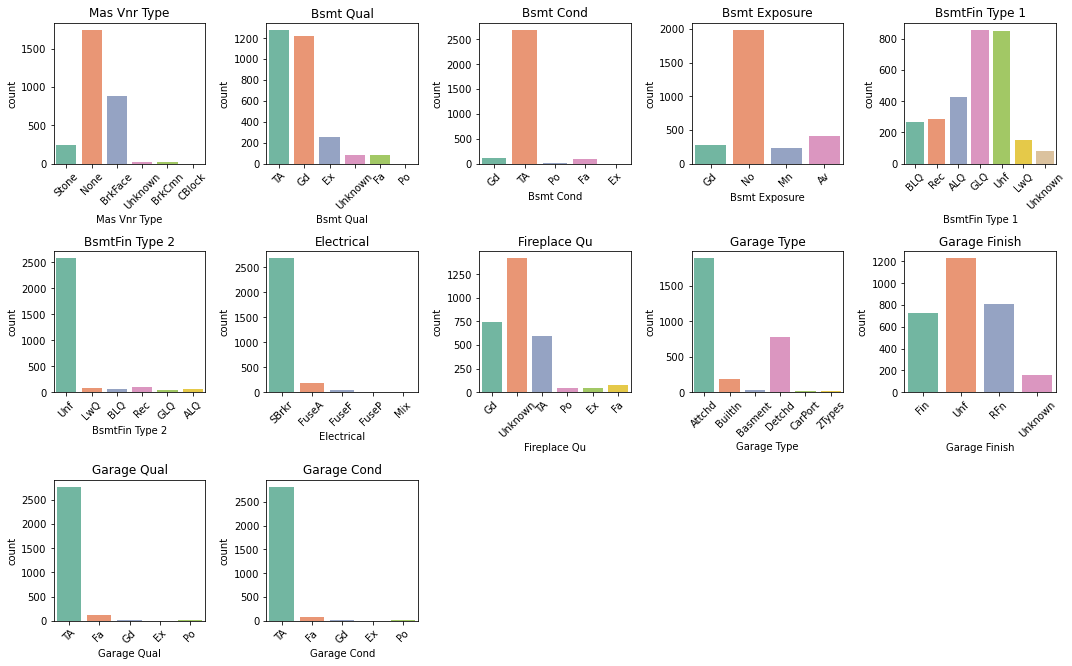

In [18]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(cat_cols_null, 1):
    plt.subplot(4, 5, i)  # Adjust subplot layout as per number of features
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(column) # print feature name along with the percantage of missing values in the feature
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### for categorical features we will introduce more methods like correlation matrix for missing values, Use box plots or violin plots to compare how the missing and non-missing values affect other features (especially numerical ones). Then imputation using Machine Learning Models (like decision trees or k-nearest neighbors) also an advance approch

### Encode categorical variables.

We will use Multiple Encoding Techniques

When to Use which Method \
One-Hot Encoding: Use for nominal (unordered) categories and when the number of categories is small. Good for most algorithms.\
Label Encoding: Use for ordinal (ordered) categories or tree-based algorithms that can handle encoded values.\
Ordinal Encoding: Use for naturally ordered categories.\
Target Encoding: Use when you have high-cardinality features and want to capture the relationship between the categorical variable and the target.\
Frequency Encoding: Use when you have high-cardinality features and need to reduce dimensionality.\
Binary Encoding: Use for high-cardinality features as a memory-efficient alternative to one-hot encoding.\

To determine the most appropriate encoding technique for categorical variables, we need to evaluate each variable based on three main factors:

1. Number of unique categories (to detect high cardinality).
2. Whether the variable is nominal or ordinal (to choose between ordinal or nominal encoding).
3. Distribution of categories (to decide between one-hot encoding, target encoding, etc.).

In [19]:
# define ordinal categories in a list (Manually)
ordinal_cat = ['Lot Shape', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Garage Finish', 'Functional', 'Paved Drive', 'Street', 'Central Air', 'Electrical', 'Utilities']

In [32]:
# a function that seperate high cardinality, nominal and ordinal variables in the datasets
def check_category_type(df, threshold=10):
    variable_info = {}
    nominal_cat = [] # define nominal categories in a list
    hc_cat = [] # define high cardinality categories in a list
    
    for col in cat_cols:
        unique_values = df[col].nunique()
        is_ordinal = col in ordinal_cat
        
        # Decide on encoding based on number of unique values and type
        if unique_values > threshold:
            encoding = 'High cardinality'
            hc_cat.append(col)
        elif is_ordinal:
            encoding = 'Ordinal'
        else:
            encoding = 'Nominal'
            nominal_cat.append(col)
        
        variable_info[col] = {
            'Unique Categories': unique_values,
            'Category Type': encoding
        }
    
    return pd.DataFrame(variable_info).T, nominal_cat, hc_cat

In [33]:
variable_analysis, nominal_cat, hc_cat = check_category_type(df)
print(variable_analysis)

               Unique Categories     Category Type
MS Zoning                      7           Nominal
Street                         2           Ordinal
Lot Shape                      4           Ordinal
Land Contour                   4           Nominal
Utilities                      3           Ordinal
Lot Config                     5           Nominal
Land Slope                     3           Ordinal
Neighborhood                  28  High cardinality
Condition 1                    9           Nominal
Condition 2                    8           Nominal
Bldg Type                      5           Nominal
House Style                    8           Nominal
Roof Style                     6           Nominal
Roof Matl                      8           Nominal
Exterior 1st                  16  High cardinality
Exterior 2nd                  17  High cardinality
Mas Vnr Type                   6           Nominal
Exter Qual                     4           Ordinal
Exter Cond                     

We will use\
One-Hot Encoding for Nominal variables,\
Ordinal Encoding for Ordinal variables,\
Binary Encoding for High cardinality variables.

### Feature Scaling (Normalization or Standardization) for numerical features

['Neighborhood', 'Exterior 1st', 'Exterior 2nd']

### Transformation

### Dealing with outliers

### Pipeline for encoding, Normalization and Transformation

We use Pipeline as we are working with multiple encoding techniques. It allows us to organize our preprocessing steps systematically and ensure consistency across both training and prediction phases.

Workflow Overview
1. Split the categorical columns into groups based on the appropriate encoding technique.
2. Use ColumnTransformer to apply different transformations (one-hot encoding, ordinal encoding and binary encoding) to different groups of columns.
3. Wrap everything in a Pipeline, which ensures that each preprocessing step is consistently applied to the data before model training or prediction.

## Transformation

Reducing the impact if outliers by performing transformation for skewed data.\
steps:
1. Calculate skewness (There is no missing values for numerical features right now)
2. Perform transformation:\
Apply a log transformation or box-cox for Highly positive skew\
Apply a cube root or square root for Highly negative skew